# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Библиотеки `pandas` и `matplotlib`

**Что куда присылать?**
* Код отдельно по каждой задаче в Яндекс.Контест. Ссылка будет отправлена каждому через бот.
* Отчет в формате pdf на русском языке телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. 
* Ноутбук никуда отправлять не нужно.
* Работы, присланные иным способом, не принимаются.

**Правила, <font color="red">прочитайте внимательно</font>:**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2. При подготовке графиков к отчету используйте также библиотеку `seaborn`.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов за Контест
* Задача 2 &mdash; 20 баллов за Контест и 20 баллов за отчет 
* Задача 3 &mdash; 20 баллов за Контест и 20 баллов за отчет 

---

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Прочитайте условие задачи в системе Яндекс.Контест. Для отправки решения вам нужно заполнить пропуски в следующем классе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes



class CatExam:
    def __init__(self, path_to_df: str="cat_exam_data.csv"):
      self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
      return self.df.head(5)
    
    def task2(self) -> tp.List[str]:
      sums = self.df.isna().sum()
      return list(sums[sums > 0].keys())

    def task3(self) -> pd.DataFrame:
      self.df = self.df.dropna()
      return self.df
    
    def task4(self) -> pd.DataFrame:
      return self.df.describe()
    
    def task5(self) -> int:
      return len(self.df[self.df['test_score'] == 100])
    
    def task6(self) -> pd.DataFrame:
      cnt_100_df = self.df[self.df['test_score'] == 100].groupby(['school', 
                            'number_of_students'], as_index=False).agg(cnt_100=('school', 'count'))

      return cnt_100_df.sort_values(by=['cnt_100', 'school'], ascending=False)

    def task7(self) -> pd.DataFrame:
      return self.df.groupby(['school', 'number_of_students'], as_index=False).agg(test_score=('test_score', 
                            'mean')).sort_values(by=['test_score'], ascending=False).head(10)

    def task8(self) -> pd.DataFrame:
      return self.df.groupby(['school', 'number_of_students'], as_index=False).agg(test_score=('test_score', 
                            'mean')).sort_values(by=['test_score'], ascending=False).tail(10)

    def task9(self) -> Axes:
      plt.hist(self.df[self.df.number_of_students > 1000]['test_score'].values, bins=10, alpha=0.5, label='Big schools')
      plt.hist(self.df[self.df.number_of_students <= 1000]['test_score'].values, bins=10, alpha=0.5, label='Small schools')
      plt.title('Distribution of grades')
      plt.legend(loc='upper right')
      plt.xlabel('test_score')
      plt.ylabel('number_of_students')
      return plt.gca()

Решение вы можете выполнить в данном ноутбуке, поочередно выполняя каждый пункт.

Отчет по задаче присылать не нужно.

---

### Задача 2.

Прочитайте условие задачи в системе Яндекс.Контест. Для отправки решения вам нужно заполнить пропуски в следующем классе.

In [53]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp


class YouTube:
    def __init__(self, path_to_df: str = "RUvideos_short.csv"):
        trending_date_parser = lambda x: datetime.strptime(x, "%y.%d.%m")
        self.df = pd.read_csv(path_to_df, parse_dates=['trending_date'], date_parser=trending_date_parser)

    def task1(self) -> pd.DataFrame:
        return self.df

    def task2(self) -> pd.DataFrame:
        self.df = self.df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
        self.df['trending_date'] = self.df['trending_date'].dt.day
        return self.df

    def task3(self) -> Figure:
        with sns.axes_style('whitegrid'):
            plt.figure(figsize=(9, 5))
            sns.boxplot(data=self.df, x='trending_date', y='views')
            plt.title("Распределение просмотров по дням")
        return plt.gcf()

    def task4(self) -> Figure:
        with sns.axes_style('whitegrid'):
            plt.figure(figsize=(9, 5))
            sns.boxplot(data=self.df, x='trending_date', y='views', showfliers=False)
            plt.title("Распределение просмотров по дням")
        return plt.gcf()

    def task5(self) -> Figure:
        with sns.axes_style('whitegrid'):
            dep_graph = sns.jointplot(data=self.df, x='views', y='likes', kind='scatter')
            dep_graph.fig.suptitle("Зависимость просмотров и лайков")
        return plt.gcf()

    def task6(self) -> Figure:
        Q1_views =  self.df['views'].quantile(0.25)
        Q3_views = self.df['views'].quantile(0.75)
        IQR_views = Q3_views - Q1_views

        Q1_likes =  self.df['likes'].quantile(0.25)
        Q3_likes = self.df['likes'].quantile(0.75)
        IQR_likes = Q3_likes - Q1_likes

        new_df = self.df[(self.df['views'] >= Q1_views-1.5*IQR_views) & (self.df['views'] <= Q3_views+1.5*IQR_views)]
        new_df = new_df[(new_df['likes'] >= Q1_likes-1.5*IQR_likes) & (new_df['likes'] <= Q3_likes+1.5*IQR_likes)]

        with sns.axes_style('whitegrid'):
            dep_graph = sns.jointplot(data=new_df, x='views', y='likes', kind='scatter')
            dep_graph.fig.suptitle("Зависимость просмотров и лайков")
        return plt.gcf()

Решение вы можете выполнить в данном ноутбуке, поочередно выполняя каждый пункт.

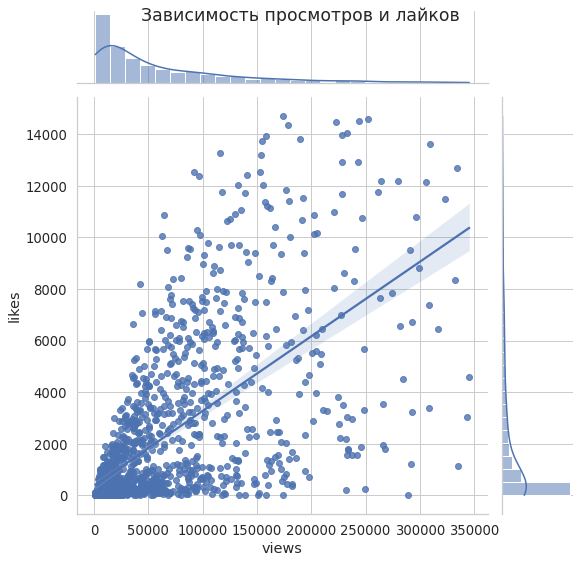

In [89]:
# trending_date_parser = lambda x: datetime.strptime(x, "%y.%d.%m")
# df = pd.read_csv("RUvideos_short.csv", parse_dates=['trending_date'], date_parser=trending_date_parser)
# df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
# # for ind_data in range(len(df['trending_date'])):
# #     df['trending_date'][ind_data] = df['trending_date'][ind_data].day
    
# # df['trending_date'][0] = df['trending_date'][0].day
# df['trending_date'] = df['trending_date'].dt.day



# Q1_views =  df['views'].quantile(0.25)
# Q3_views = df['views'].quantile(0.75)
# IQR_views = Q3_views - Q1_views

# Q1_likes =  df['likes'].quantile(0.25)
# Q3_likes = df['likes'].quantile(0.75)
# IQR_likes = Q3_likes - Q1_likes

# new_df = df[(df['views'] >= Q1_views-1.5*IQR_views) & (df['views'] <= Q3_views+1.5*IQR_views)]
# new_df = new_df[(new_df['likes'] >= Q1_likes-1.5*IQR_likes) & (new_df['likes'] <= Q3_likes+1.5*IQR_likes)]

# # new_df

# with sns.axes_style('whitegrid'):
# #     plt.figure(figsize=(9, 5))
#     sns.jointplot(data=new_df, x='views', y='likes', kind='scatter')
# # df

trending_date_parser = lambda x: datetime.strptime(x, "%y.%d.%m")
df = pd.read_csv("RUvideos_short.csv", parse_dates=['trending_date'], date_parser=trending_date_parser)

df = df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
df['trending_date'] = df['trending_date'].dt.day

# with sns.axes_style('whitegrid'):
#             plt.figure(figsize=(9, 9))
#             sns.boxplot(data=df, x='trending_date', y='views', showfliers=False)
#             plt.title("Распределение просмотров по дням")

Q1_views = df['views'].quantile(0.25)
Q3_views = df['views'].quantile(0.75)
IQR_views = Q3_views - Q1_views

Q1_likes =  df['likes'].quantile(0.25)
Q3_likes = df['likes'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes

new_df = df[(df['views'] >= Q1_views-1.5*IQR_views) & (df['views'] <= Q3_views+1.5*IQR_views)]
new_df = new_df[(new_df['likes'] >= Q1_likes-1.5*IQR_likes) & (new_df['likes'] <= Q3_likes+1.5*IQR_likes)]

with sns.axes_style('whitegrid'):
#     plt.figure(figsize=(15, 15))
#     new_df['likes'] = new_df['likes'] * 1e-3
#     new_df['views'] = new_df['views'] * 1e-5
    dep_graph = sns.jointplot(data=new_df, x='views', y='likes', kind='reg', height=8)
    dep_graph.fig.suptitle("Зависимость просмотров и лайков")

Сохраните все необходимые графики, проследив за их информативностью и эстетичностью. Оформите проведенное исследование в pdf-файл, в котором будут:
* краткая постановка задачи (1-2 предложения);
* все необходимые графики с кратким описанием;
* выводы.

Выводы должны быть достаточно краткими, но емкими. Не нужно специально "доливать воды", но и выводы-отписки не лучше. Никакой код размещать в pdf не нужно.

---

### Задача 3.

Прочитайте условие задачи в системе Яндекс.Контест. Для отправки решения вам нужно заполнить пропуски в следующем классе.

In [4]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__(
        self,
        trends_df_path: str="RUvideos_short.csv",
        categories_df_path: str="RU_category_id.json"
    ):
        trending_date_parser = lambda x: datetime.strptime(x, "%y.%d.%m")
        self.trends_df = pd.read_csv(trends_df_path, parse_dates=['trending_date'], date_parser=trending_date_parser)

        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)
          
        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
                {'id': int(item['id']),
                'name': item['snippet']['title']},
                ignore_index=True
            )
          
        self.categories_df['id'] = self.categories_df['id'].astype(int)


    def task1(self) -> pd.DataFrame:
        self.trends_df = self.trends_df.merge(self.categories_df, left_on='category_id', right_on='id')
        return self.trends_df
    

    def task2(self) -> pd.DataFrame:
        self.trends_df['trending_date'] = self.trends_df['trending_date'].dt.date
        self.pivot_table_views = pd.pivot_table(self.trends_df, index='name', 
                                                columns='trending_date', values='views', aggfunc='sum')
        return self.pivot_table_views


    def task3(self) -> Figure:
        self.pivot_table_views = self.pivot_table_views * 1e-6
        plt.figure(figsize = (9,9))
        sns.set(font_scale=1.2)
        plt.title('Распределение количества просмотров (1е-6)')
        sns.heatmap(self.pivot_table_views, annot=True, linewidths=.5)
        return plt.gcf()


    def task4(self) -> pd.DataFrame:
        self.pivot_table_views_sums = pd.pivot_table(self.trends_df, index='name', 
                                                     columns='trending_date', values='views', aggfunc='sum', 
                                                     margins=True, margins_name='Всего просмотров')
        return self.pivot_table_views_sums


    def task5(self) -> Figure:
        self.pivot_table_views_sums = self.pivot_table_views_sums * 1e-6
        plt.figure(figsize = (9,9))
        sns.set(font_scale=1.2)
        plt.title('Распределение количества просмотров (1е-6)')
        sns.heatmap(self.pivot_table_views_sums, annot=True, linewidths=.5, vmax = 5)
        return plt.gcf()

Решение вы можете выполнить в данном ноутбуке, поочередно выполняя каждый пункт.

<AxesSubplot:title={'center':'Распределение количества просмотров (1е6)'}, xlabel='trending_date', ylabel='category_name'>

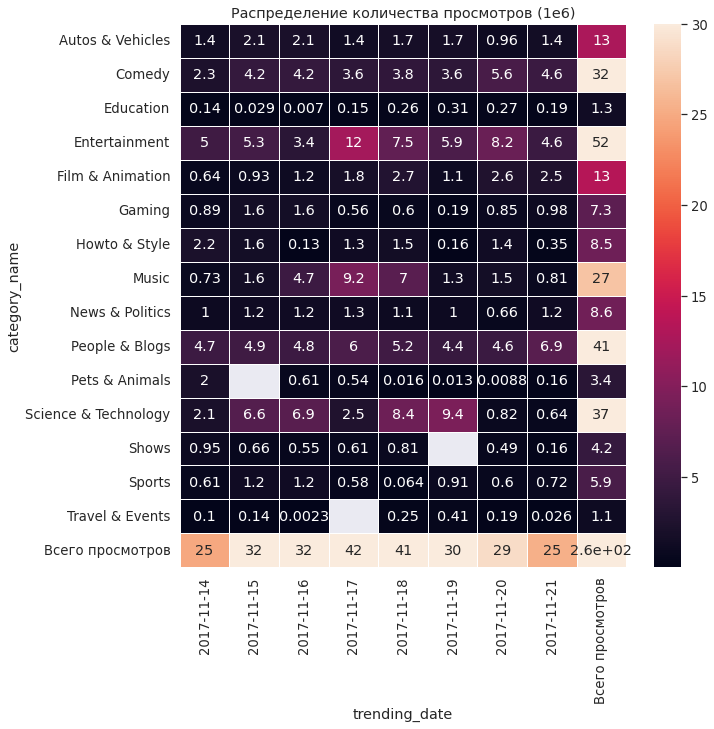

In [95]:
# trends_df = pd.read_csv("RUvideos_short.csv")
# trends_df.info()

trending_date_parser = lambda x: datetime.strptime(x, "%y.%d.%m")
trends_df = pd.read_csv("RUvideos_short.csv", parse_dates=['trending_date'], date_parser=trending_date_parser)
# trends_df

with open("RU_category_id.json") as json_file:
            json_data = json.load(json_file)
categories_df = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    categories_df = categories_df.append(
                {'id': int(item['id']),
                'name': item['snippet']['title']},
                ignore_index=True
    )
categories_df['id'] = categories_df['id'].astype(int)
# categories_df
# trends_df
trends_df = trends_df.merge(categories_df, left_on='category_id', right_on='id').drop(columns=['category_id', 'id']).rename(columns={'name':'category_name'})
trends_df['trending_date'] = trends_df['trending_date'].dt.date


# pivot_table_views = pd.pivot_table(trends_df, index='category_name', columns='trending_date', values='views', aggfunc='sum')
# pivot_table_views = pivot_table_views * 1e-6
# plt.figure(figsize = (9,9))
# plt.title('Распределение количества просмотров (1е6)')
# sns.set(font_scale=1.2)
# sns.heatmap(pivot_table_views, annot=True, linewidths=.5)

pivot_table_views_sums = pd.pivot_table(trends_df, index='category_name', 
                                                     columns='trending_date', values='views', aggfunc='sum',
                                                     margins=True, margins_name='Всего просмотров')
pivot_table_views_sums = pivot_table_views_sums * 1e-6
plt.figure(figsize = (10,10))
plt.title('Распределение количества просмотров (1е6)')
sns.set(font_scale=1.2)
sns.heatmap(pivot_table_views_sums, annot=True, linewidths=.5, vmax = 30)


Сохраните все необходимые графики, проследив за их информативностью и эстетичностью. Оформите проведенное исследование в pdf-файл, в котором будут:
* краткая постановка задачи (1-2 предложения);
* все необходимые графики с кратким описанием;
* выводы.

Выводы должны быть достаточно краткими, но емкими. Не нужно специально "доливать воды", но и выводы-отписки не лучше. Никакой код размещать в pdf не нужно.